In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from collections import defaultdict
from nltk.corpus import wordnet as wn

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from textblob import *

In [4]:
from google.colab import files
data = files.upload()

Saving trump_comment.csv to trump_comment (1).csv


In [5]:
import io
trump = pd.read_csv(io.BytesIO(data['trump_comment.csv']),encoding='ISO-8859-1',index_col=0)

trump.head()

,DateTime(seconds),Topic,Post,Comment
0,37,United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,How can any intelligent person believe that Do...
1,37,United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,Pay for the wall or their transport back home.
2,39,United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,would he pay for a smart wall though?
3,60,United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,Hillary thinks saying 'everybody accepts big m...
4,68,United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,Seriously should charge other countries for ch...


In [6]:
import re
trump['Comment'] = [re.sub('(\\W|\\d)', " ",str(text)) for text in trump['Comment']]

In [7]:
def get_tweet_sentiment(text): 
    
    analysis = TextBlob(text) 
    # set sentiment 
    if analysis.sentiment.polarity > 0: 
        return('positive')
    elif analysis.sentiment.polarity == 0: 
        return ('neutral')
    else: 
        return ('negative')

In [8]:
trump['Sentiment'] = list(map(get_tweet_sentiment,trump['Comment']))

In [9]:
trump.Sentiment.value_counts()

neutral     4752
positive    3775
negative    2228
Name: Sentiment, dtype: int64

In [10]:
trump.head()

,DateTime(seconds),Topic,Post,Comment,Sentiment
0,37,United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,How can any intelligent person believe that Do...,positive
1,37,United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,Pay for the wall or their transport back home,neutral
2,39,United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,would he pay for a smart wall though,positive
3,60,United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,Hillary thinks saying everybody accepts big m...,positive
4,68,United States presidential election 2016,Former Mexican president slams Trump's 'stupid...,Seriously should charge other countries for ch...,negative


In [11]:
trump = trump[['Comment','Sentiment']]

In [12]:
trump.shape

(10755, 2)

In [13]:
trump.isnull().sum()

Comment      0
Sentiment    0
dtype: int64

In [14]:
trump.dropna(inplace=True)

In [15]:
trump.dtypes

Comment      object
Sentiment    object
dtype: object

In [16]:
trump['Sentiment']=trump['Sentiment'].astype("category")

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm

In [18]:
train_X, test_X, train_y, test_y = train_test_split(trump['Comment'],trump['Sentiment'],test_size=0.3,random_state=523)

In [19]:
nltk.download('stopwords')
stop_words = stopwords.words('english')

Tfidf_vect = TfidfVectorizer(min_df=5,max_df=0.8,sublinear_tf=True,use_idf=True)
Tfidf_vect.fit(train_X)
train_X_Tfidf = Tfidf_vect.transform(train_X)
test_X_Tfidf = Tfidf_vect.transform(test_X)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
print(train_X_Tfidf)

  (0, 2094)	0.10864745872694231
  (0, 2073)	0.15316570675988783
  (0, 2055)	0.09440532207698565
  (0, 2052)	0.13435494043808402
  (0, 1997)	0.3664394099207924
  (0, 1772)	0.26591946251222176
  (0, 1751)	0.2901372844759637
  (0, 1687)	0.24403370949870706
  (0, 1527)	0.17294848891135656
  (0, 1491)	0.19315991882930886
  (0, 1450)	0.11908922529627743
  (0, 1434)	0.14026518234641902
  (0, 1410)	0.20519144423461383
  (0, 1136)	0.2952737812909242
  (0, 1106)	0.23113511026874986
  (0, 997)	0.17531944174821704
  (0, 959)	0.1333412187744438
  (0, 925)	0.25572120923054115
  (0, 825)	0.1262927784450697
  (0, 609)	0.26529151722448047
  (0, 360)	0.3240642408172369
  (1, 2055)	0.10872911502711499
  (1, 1611)	0.3100336794943484
  (1, 1563)	0.42203799399418507
  (1, 1450)	0.13715822149486176
  :	:
  (7525, 899)	0.3540455389670264
  (7525, 73)	0.33120347176071546
  (7526, 2344)	0.6849972553065882
  (7526, 1756)	0.7285456473155549
  (7527, 2299)	0.2154942310820915
  (7527, 2226)	0.20263176531490806
  (7

In [21]:
Dense_mat = train_X_Tfidf.todense()
Tfidf_Mat = pd.DataFrame(Dense_mat, columns=Tfidf_vect.get_feature_names())
# Tfidf_Mat.shape
Tfidf_Mat.head()

,ability,able,abolish,abortion,about,above,absolutely,abuse,accepted,accomplished,according,account,accounts,achieve,across,act,acting,action,actions,activities,acts,actual,actually,ad,add,address,administration,admit,ads,adult,advance,advantage,affairs,afford,affordable,afghan,afraid,africa,african,after,...,works,world,worried,worry,worse,worship,worst,worth,worthless,would,wouldn,wounded,wow,write,wrong,wrote,ww,www,ya,yard,yea,yeah,year,years,yep,yes,yesterday,yet,yo,york,you,young,younger,your,yourself,youth,youtube,yrs,zero,zika
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
from sklearn.metrics import classification_report,accuracy_score, recall_score, precision_score

In [23]:
acc_dict_train = {}
acc_dict_test = {}

In [24]:
# Classifier - Algorithm - SVM
# fit the training dataset on the classifier
SVM = svm.SVC(kernel='linear')
SVM.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train1 = SVM.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test1 = SVM.predict(test_X_Tfidf)

# Use accuracy_score function to get the accuracy
train_rmse1 = accuracy_score(train_y, pred_train1)*100
test_rmse1 = accuracy_score(test_y, pred_test1)*100
print("SVM Accuracy Score on Train set -> ", train_rmse1)
print("SVM Accuracy Score on Validation set -> ", test_rmse1)

acc_dict_test['SVM'] = accuracy_score(test_y, pred_test1)*100
acc_dict_train['SVM'] = accuracy_score(train_y, pred_train1)*100


SVM Accuracy Score on Train set ->  93.42454835281615
SVM Accuracy Score on Validation set ->  85.65230864580106


In [25]:
print(classification_report(test_y,pred_test1))

              precision    recall  f1-score   support

    negative       0.84      0.64      0.72       678
     neutral       0.86      0.97      0.91      1421
    positive       0.85      0.85      0.85      1128

    accuracy                           0.86      3227
   macro avg       0.85      0.82      0.83      3227
weighted avg       0.86      0.86      0.85      3227



In [26]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [27]:
metric = defaultdict(list)
metric['SVM'].append(precision_score(train_y, pred_train1,average='macro'))
metric['SVM'].append(recall_score(train_y, pred_train1,average='macro'))
metric['SVM'].append(f1_score(train_y, pred_train1,average='macro'))

In [28]:
# Classifier - Algorithm - Random Forest Algorithm

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier
Rforest = RandomForestClassifier(n_estimators=100)

# fit the training dataset on the classifier
Rforest.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train1 = Rforest.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test1 = Rforest.predict(test_X_Tfidf)

train_rmse2=accuracy_score(train_y, pred_train1)*100
test_rmse2 =accuracy_score(test_y, pred_test1)*100


# Use accuracy_score function to get the accuracy
print("RandomForest Accuracy Score on Train set -> ",train_rmse2 )
print("RandomForest Accuracy Score on Validation set -> ",test_rmse2)

acc_dict_test['RF'] = accuracy_score(test_y, pred_test1)*100
acc_dict_train['RF'] = accuracy_score(train_y, pred_train1)*100

RandomForest Accuracy Score on Train set ->  99.80074388947928
RandomForest Accuracy Score on Validation set ->  75.24016114037806


In [29]:
print(classification_report(test_y,pred_test1))

              precision    recall  f1-score   support

    negative       0.90      0.28      0.43       678
     neutral       0.78      0.91      0.84      1421
    positive       0.70      0.83      0.76      1128

    accuracy                           0.75      3227
   macro avg       0.79      0.68      0.68      3227
weighted avg       0.78      0.75      0.73      3227



In [30]:
metric['RF'].append(precision_score(train_y, pred_train1,average='macro'))
metric['RF'].append(recall_score(train_y, pred_train1,average='macro'))
metric['RF'].append(f1_score(train_y, pred_train1,average='macro'))

In [31]:
# fit the training dataset on the NB classifier
Naive = naive_bayes.MultinomialNB()
Naive.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train = Naive.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test = Naive.predict(test_X_Tfidf)

train_rmse3=accuracy_score(train_y, pred_train)*100
test_rmse3=accuracy_score(test_y, pred_test)*100



# Use accuracy_score function to get the accuracy
print("Naive Bayes Accuracy Score on Train set -> ", train_rmse3)
print("Naive Bayes Accuracy Score on Validation set -> ",test_rmse3)

acc_dict_test['NB'] = accuracy_score(test_y, pred_test)*100
acc_dict_train['NB'] = accuracy_score(train_y, pred_train)*100

Naive Bayes Accuracy Score on Train set ->  83.0366631243358
Naive Bayes Accuracy Score on Validation set ->  75.24016114037806


In [32]:
print(classification_report(test_y,pred_test1))

              precision    recall  f1-score   support

    negative       0.90      0.28      0.43       678
     neutral       0.78      0.91      0.84      1421
    positive       0.70      0.83      0.76      1128

    accuracy                           0.75      3227
   macro avg       0.79      0.68      0.68      3227
weighted avg       0.78      0.75      0.73      3227



In [33]:
metric['NB'].append(precision_score(train_y, pred_train,average='macro'))
metric['NB'].append(recall_score(train_y, pred_train,average='macro'))
metric['NB'].append(f1_score(train_y, pred_train,average='macro'))

In [34]:
# Logistic Regression Algorithm
# fit the training dataset on the classifier
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(random_state=0).fit(train_X_Tfidf,train_y)

clf.score(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train1 = clf.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test1 = clf.predict(test_X_Tfidf)

train_rmse4=accuracy_score(train_y, pred_train1)*100
test_rmse4=accuracy_score(test_y, pred_test1)*100

# Use accuracy_score function to get the accuracy
print("Logistic Regression Accuracy Score on Train set -> ",train_rmse4 )
print("Logistic Regression Accuracy Score on Validation set -> ",test_rmse4)

acc_dict_test['LG'] = accuracy_score(test_y, pred_test1)*100
acc_dict_train['LG'] = accuracy_score(train_y, pred_train1)*100


Logistic Regression Accuracy Score on Train set ->  90.54197662061637
Logistic Regression Accuracy Score on Validation set ->  82.18159281066005


In [35]:
print(classification_report(test_y,pred_test1))

              precision    recall  f1-score   support

    negative       0.87      0.54      0.67       678
     neutral       0.82      0.94      0.87      1421
    positive       0.81      0.84      0.83      1128

    accuracy                           0.82      3227
   macro avg       0.83      0.77      0.79      3227
weighted avg       0.83      0.82      0.81      3227



In [36]:
metric['LG'].append(precision_score(train_y, pred_train1,average='macro'))
metric['LG'].append(recall_score(train_y, pred_train1,average='macro'))
metric['LG'].append(f1_score(train_y, pred_train1,average='macro'))

In [37]:
# Classifier - Algorithm - Decision Tree
# fit the training dataset on the classifier
from sklearn.tree import DecisionTreeClassifier
Dtree = DecisionTreeClassifier(random_state=0)
Dtree.fit(train_X_Tfidf,train_y)

# predict the labels on train dataset
pred_train1 = Dtree.predict(train_X_Tfidf)

# predict the labels on validation dataset
pred_test1 = Dtree.predict(test_X_Tfidf)

train_rmse5=accuracy_score(train_y, pred_train1)*100
test_rmse5=accuracy_score(test_y, pred_test1)*100

# Use accuracy_score function to get the accuracy
print("Decision tree Accuracy Score on Train set -> ",train_rmse5 )
print("Decision tree Accuracy Score on Validation set -> ",test_rmse5)

acc_dict_test['DT'] = accuracy_score(test_y, pred_test1)*100
acc_dict_train['DT'] = accuracy_score(train_y, pred_train1)*100

Decision tree Accuracy Score on Train set ->  99.80074388947928
Decision tree Accuracy Score on Validation set ->  71.3975828943291


In [38]:
print(classification_report(test_y,pred_test1))

              precision    recall  f1-score   support

    negative       0.53      0.45      0.49       678
     neutral       0.78      0.86      0.82      1421
    positive       0.72      0.69      0.70      1128

    accuracy                           0.71      3227
   macro avg       0.68      0.67      0.67      3227
weighted avg       0.71      0.71      0.71      3227



In [39]:
metric['DT'].append(precision_score(train_y, pred_train1,average='macro'))
metric['DT'].append(recall_score(train_y, pred_train1,average='macro'))
metric['DT'].append(f1_score(train_y, pred_train1,average='macro'))

In [40]:
tmp = pd.DataFrame(dict(metric),index=['precision','recall','f1'])

In [42]:
import matplotlib.pyplot as plt

## Visualization and comparison of metrics for all the models or algorithms

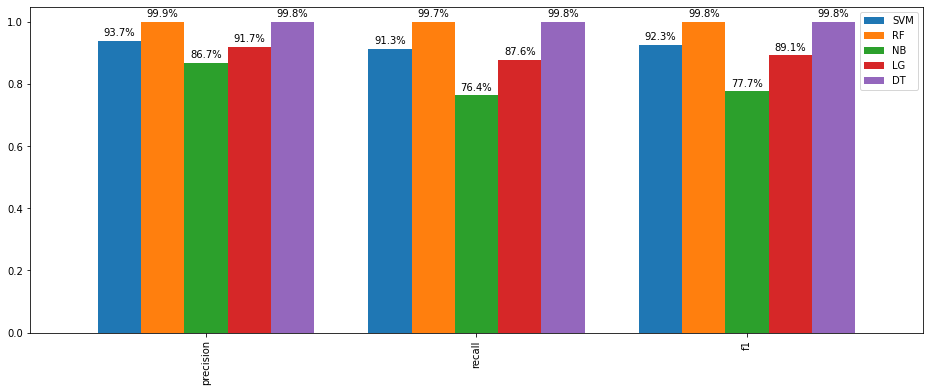

In [48]:
ax=tmp.plot(kind='bar',figsize=(16,6),width=0.8)
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height*100:.3}%', (x + width/2, y + height*1.02), ha='center')
plt.show()

## RMSE evaluation

In [49]:
from sklearn.metrics import mean_squared_error
var1 =(mean_squared_error([train_rmse1],[test_rmse1]))
var2 =(mean_squared_error([train_rmse2],[test_rmse2]))
var3 =(mean_squared_error([train_rmse3],[test_rmse3]))
var4 = (mean_squared_error([train_rmse4],[test_rmse4]))
var5 = (mean_squared_error([train_rmse4],[test_rmse4]))
var1=np.sqrt(var1)
var2=np.sqrt(var2)
var3=np.sqrt(var3)
var4=np.sqrt(var4)
var5=np.sqrt(var5)
print("RMSE of SVM",var1)
print("RMSE of Random Forest",var2)
print("RMSE of Naive Bayes",var3)
print("RMSE of Logistic Regression",var4)
print("RMSE of Decision Tree",var4)

RMSE of SVM 7.772239707015089
RMSE of Random Forest 24.560582749101215
RMSE of Naive Bayes 7.796501983957739
RMSE of Logistic Regression 8.360383809956318
RMSE of Decision Tree 8.360383809956318


## Bar plot of accuracy of different models trained above.

In [51]:
x = np.arange(5)  # the label locations
width = 0.35

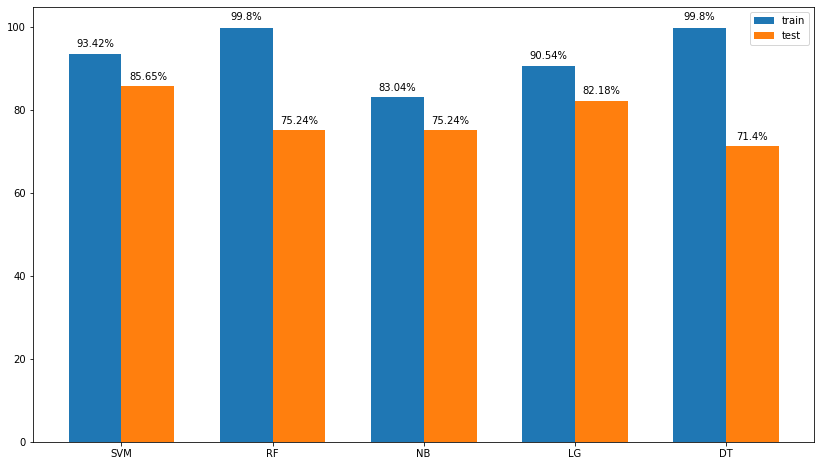

In [52]:
fig,ax = plt.subplots(figsize=(14,8))

#ax = plt.subplot(121)

br = ax.bar(x-width/2,list(acc_dict_train.values()),width, label='train')
br2 = ax.bar(x+width/2,list(acc_dict_test.values()),width, label='test')
ax.set_xticks((0,1,2,3,4))
ax.set_xticklabels(['SVM','RF','NB','LG','DT'])
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.4}%', (x + width/2, y + height*1.02), ha='center')
ax.legend(loc='upper right')
#fig.tight_layout()
plt.show()